In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
# Reading preliminaryDataset: "1980-2014 Election Data.csv" file from Github
df = pd.read_csv("https://raw.githubusercontent.com/mmingoia/HTML_ML_Group_Project/MikeMingoia/1980-2014%20Election%20Data.csv")

df

,Year,ICPSR State Code,Alphanumeric State Code,Unnamed: 3,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible
0,2014,0,0,United States,36.7%,36.0%,33.2%,"83,262,122","81,687,059","227,157,964","245,712,915",8.4%,"1,493,706","2,298,993","548,576","3,329,718","5,345,814"
1,2014,41,1,Alabama,33.2%,32.9%,31.5%,"1,191,274","1,180,413","3,588,783","3,751,844",2.5%,"31,691","53,640","8,097","69,826",NaN
2,2014,81,2,Alaska,54.8%,54.2%,51.0%,"285,431","282,382","520,562","553,473",3.9%,"5,216","7,077","2,210","11,389",NaN
3,2014,61,3,Arizona,34.1%,33.4%,29.5%,"1,537,671","1,506,416","4,510,186","5,110,890",10.1%,"37,516","73,232","7,502","86,028",NaN
4,2014,42,4,Arkansas,40.3%,40.1%,37.5%,"852,642","848,592","2,117,881","2,263,040",4.0%,"17,756","28,192","21,743","55,287",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1980,40,47,Virginia,NaN,48.7%,47.5%,NaN,"1,866,032","3,830,887","3,927,383",2.0%,"8,920","11,463","4,783","19,435",NaN
932,1980,73,48,Washington,60.6%,59.6%,57.4%,"1,772,904","1,742,394","2,923,670","3,037,193",2.9%,"4,399","12,527","14,669","25,332",NaN
933,1980,56,49,West Virginia,53.5%,53.2%,52.8%,"742,150","737,715","1,387,231","1,396,595",0.5%,"1,257","2,650",475,"3,057",NaN
934,1980,25,50,Wisconsin,NaN,68.4%,67.4%,NaN,"2,273,221","3,322,053","3,371,087",1.0%,"3,980","19,088","2,639","16,163",NaN


In [5]:
# Create new dataset for simple linear regression
new_df = df[['Unnamed: 3','Total Ballots Counted','Voting-Eligible Population (VEP)']]
new_df


,Unnamed: 3,Total Ballots Counted,Voting-Eligible Population (VEP)
0,United States,"83,262,122","227,157,964"
1,Alabama,"1,191,274","3,588,783"
2,Alaska,"285,431","520,562"
3,Arizona,"1,537,671","4,510,186"
4,Arkansas,"852,642","2,117,881"
...,...,...,...
931,Virginia,NaN,"3,830,887"
932,Washington,"1,772,904","2,923,670"
933,West Virginia,"742,150","1,387,231"
934,Wisconsin,NaN,"3,322,053"


In [6]:
# Replace NaN with 0
clean_df = new_df.replace(np.nan,0)
# Rename Columns
columns_renamed = {'Unnamed: 3':'State','Total Ballots Counted':'total_ballots_counted', 'Voting-Eligible Population (VEP)':'Voting_Eligible_Population'}
clean_df.rename(columns=columns_renamed, inplace=True)
clean_df

,State,total_ballots_counted,Voting_Eligible_Population
0,United States,"83,262,122","227,157,964"
1,Alabama,"1,191,274","3,588,783"
2,Alaska,"285,431","520,562"
3,Arizona,"1,537,671","4,510,186"
4,Arkansas,"852,642","2,117,881"
...,...,...,...
931,Virginia,0,"3,830,887"
932,Washington,"1,772,904","2,923,670"
933,West Virginia,"742,150","1,387,231"
934,Wisconsin,0,"3,322,053"


In [7]:
clean_df.dtypes

State                         object
total_ballots_counted         object
Voting_Eligible_Population    object
dtype: object

In [8]:
# Cast type as str first
clean_df['total_ballots_counted'] = clean_df['total_ballots_counted'].astype('str')
clean_df['Voting_Eligibile_Population'] = clean_df['Voting_Eligible_Population'].astype('str')

In [9]:
# Remove parsers to convert to integer
clean_df['total_ballots_counted'] = clean_df['total_ballots_counted'].str.replace(',', '')
clean_df['Voting_Eligible_Population'] = clean_df['Voting_Eligible_Population'].str.replace(',','')

In [10]:
# Cast type from str to numeric
clean_df['total_ballots_counted'] = pd.to_numeric(clean_df['total_ballots_counted'])
clean_df['Voting_Eligible_Population'] = pd.to_numeric(clean_df['Voting_Eligible_Population'])
print(clean_df.dtypes)

State                          object
total_ballots_counted           int64
Voting_Eligible_Population      int64
Voting_Eligibile_Population    object
dtype: object


In [11]:
# Drop first row, USA
clean_df = clean_df.drop(clean_df.index[0])

In [12]:
clean_df


,State,total_ballots_counted,Voting_Eligible_Population,Voting_Eligibile_Population
1,Alabama,1191274,3588783,"3,588,783"
2,Alaska,285431,520562,"520,562"
3,Arizona,1537671,4510186,"4,510,186"
4,Arkansas,852642,2117881,"2,117,881"
5,California,7513972,24440416,"24,440,416"
...,...,...,...,...
931,Virginia,0,3830887,"3,830,887"
932,Washington,1772904,2923670,"2,923,670"
933,West Virginia,742150,1387231,"1,387,231"
934,Wisconsin,0,3322053,"3,322,053"


In [17]:
# Save cleaned data
file_path = '../HTML_ML_Group_Project/preliminary_dataset_cleaned.csv'
clean_df.to_csv(file_path, index=False)

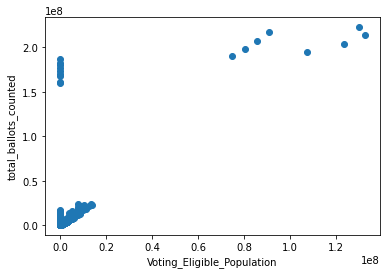

In [14]:
# Plot linear regression
plt.scatter(clean_df.total_ballots_counted, clean_df.Voting_Eligible_Population)
plt.xlabel('Voting_Eligible_Population')
plt.ylabel('total_ballots_counted')
plt.show()

In [15]:
# Read secondary dataset
df1 = pd.read_csv("https://ivote.s3.us-east-2.amazonaws.com/epi+indicators-all+years.csv")

df1

,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,prov_partic,...,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,AK,Alaska,2008,0,0,NaN,NaN,NaN,0.068102,0.062139,...,1.0,0.152142,NaN,0.052107,NaN,0,5.712700,0.003495,0.875693,0.682773
1,AK,Alaska,2010,1,1,0.0,1.0,0,0.082050,0.049773,...,1.0,NaN,0.093135,NaN,0.035279,0,NaN,NaN,0.835431,0.525560
2,AK,Alaska,2012,1,1,0.0,1.0,0,0.097063,0.060354,...,1.0,0.120155,NaN,0.063834,NaN,0,3.656872,0.003974,0.868472,0.591806
3,AK,Alaska,2014,1,1,0.0,1.0,0,0.086496,0.056739,...,1.0,NaN,0.093120,NaN,0.020184,0,4.156598,NaN,0.826949,0.543818
4,AL,Alabama,2008,0,0,NaN,NaN,NaN,0.000439,NaN,...,0.0,0.226150,NaN,0.075939,NaN,0,14.260800,NaN,0.852208,0.609528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,WV,West Virginia,2014,1,1,0.0,1.0,1,0.004942,0.006877,...,1.0,NaN,0.178077,NaN,0.034844,0,3.771747,NaN,0.756622,0.311667
200,WY,Wyoming,2008,1,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.128153,NaN,0.059821,NaN,0,5.620379,0.005349,0.782883,0.631045
201,WY,Wyoming,2010,1,0,0.0,0.0,0,NaN,NaN,...,1.0,NaN,0.133298,NaN,0.020943,0,NaN,NaN,0.725026,0.458080
202,WY,Wyoming,2012,1,0,0.0,0.0,0,NaN,NaN,...,1.0,0.115326,NaN,0.041794,NaN,0,4.516539,0.006542,0.746732,0.592977
